In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib
import lxml
from bs4 import BeautifulSoup
%matplotlib inline 

In [2]:
train=pd.read_csv('Titanic-Dataset.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


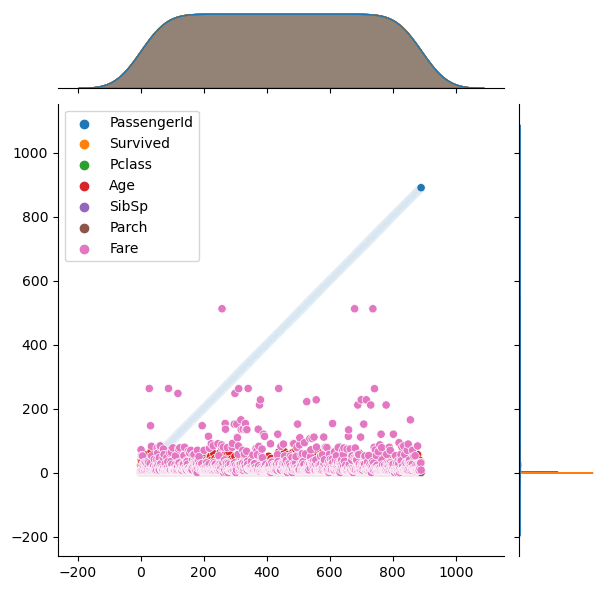

In [6]:
sns.jointplot(data=train)

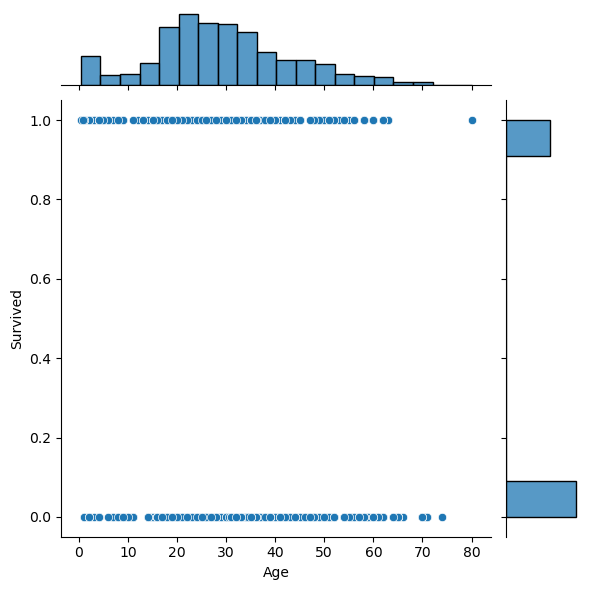

In [7]:
sns.jointplot(x='Age',y='Survived',data=train)

In [8]:
train.isnull() ## first thing to find out that if there is any null value or NaN value 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

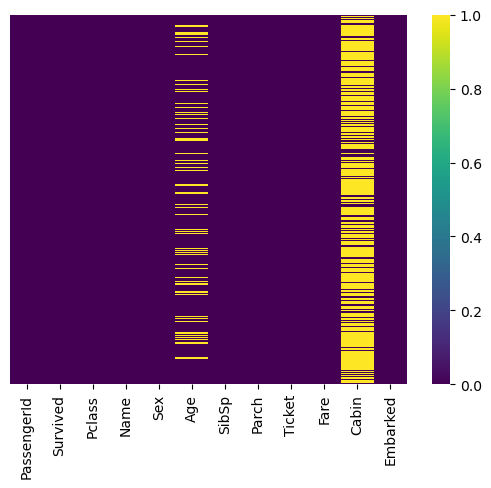

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

We are missing too much of the cabin data and we will be unable to replace it by anything else so we might have to drop thic column later from our calculations. 

D:\Users\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


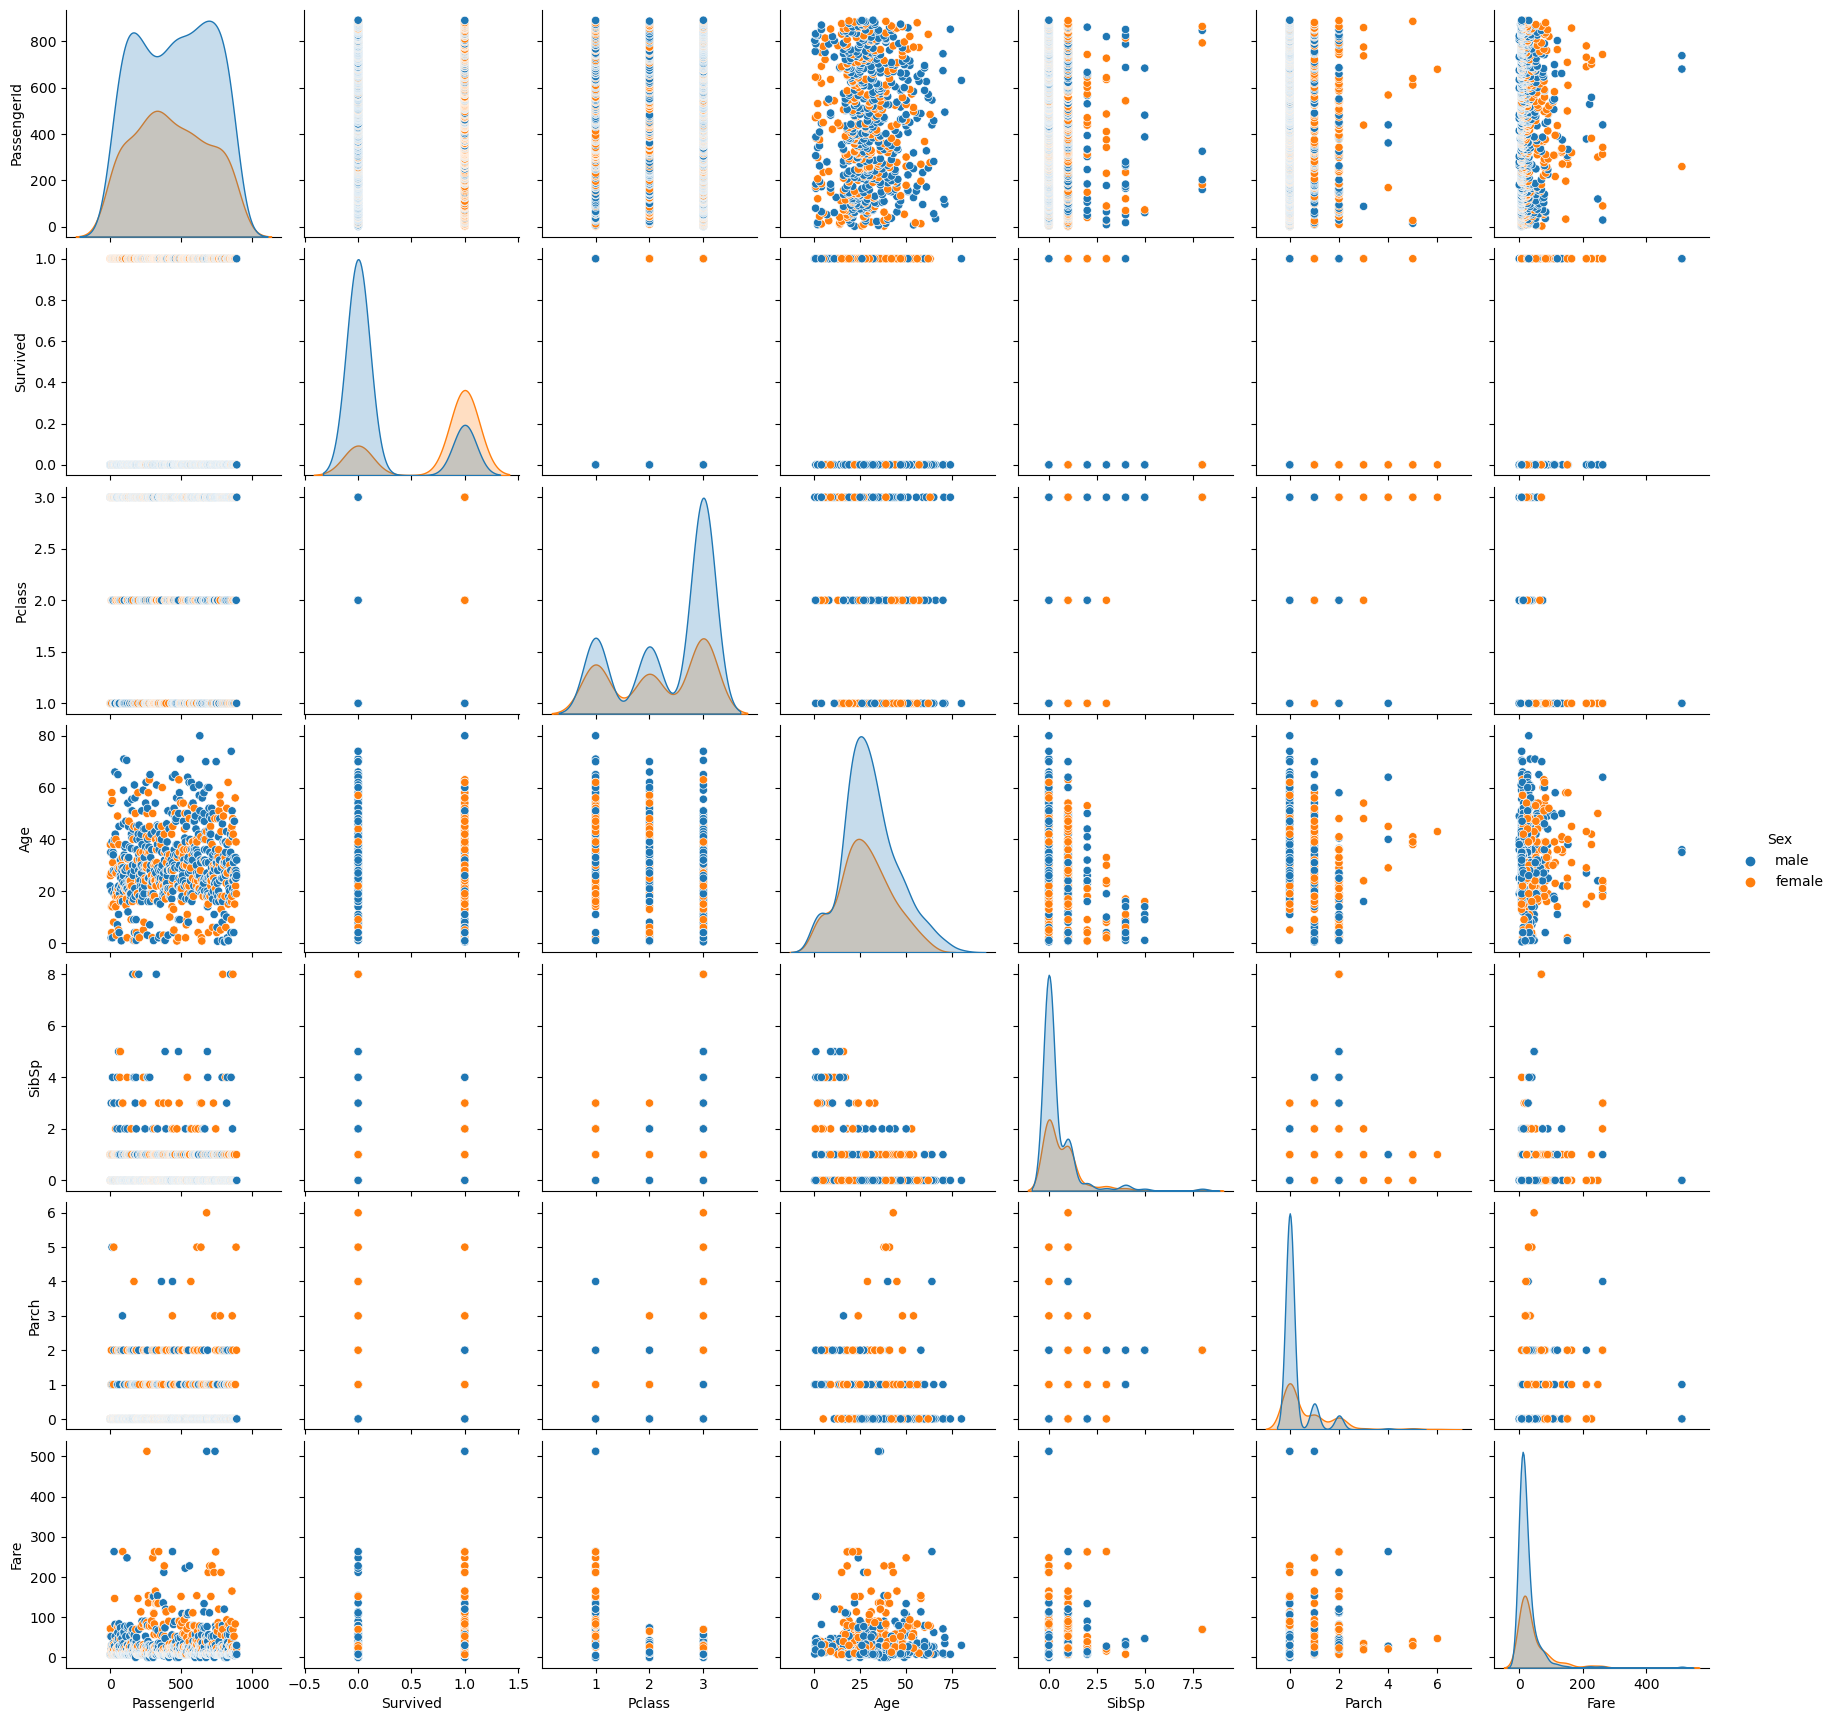

In [10]:
sns.pairplot(hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

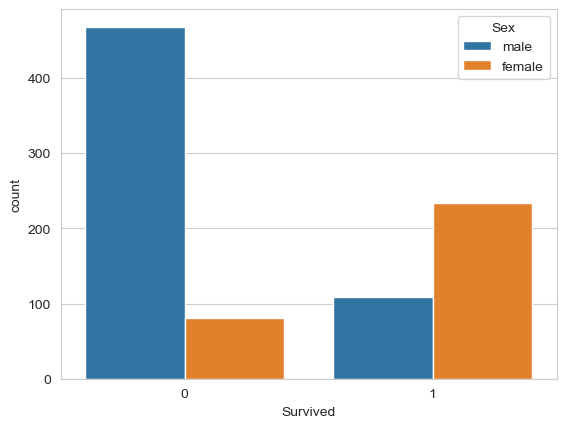

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

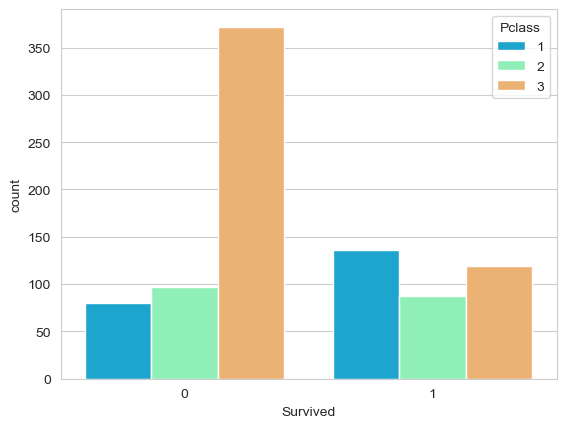

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [4]:
train.select_dtypes(include=['float64','int64']).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: xlabel='Age', ylabel='Count'>

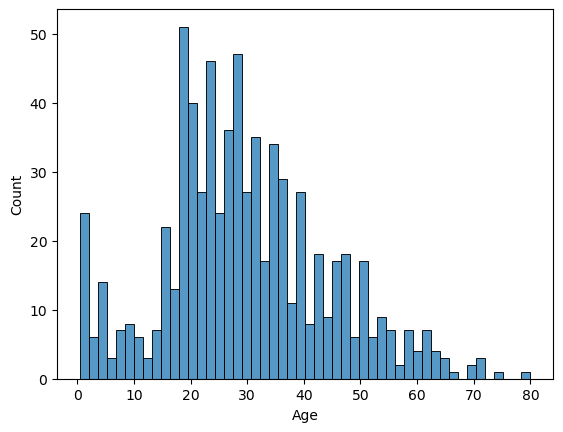

In [7]:
sns.histplot(train['Age'],bins=50) ## dropna is used for dropping the NaN value 


C:\Users\zakia zaman\AppData\Local\Temp\ipykernel_8872\523791221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Pclass'])


<Axes: xlabel='Pclass', ylabel='Density'>

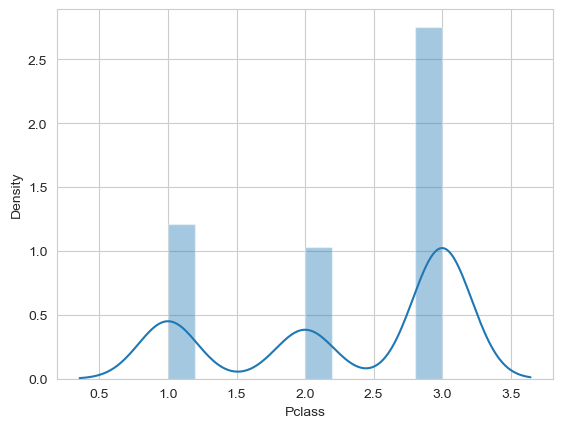

In [15]:
sns.distplot(train['Pclass'])

<Axes: xlabel='SibSp', ylabel='count'>

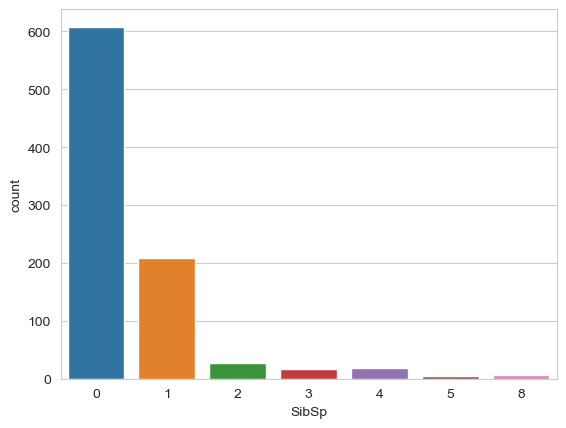

In [16]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Fare', ylabel='Count'>

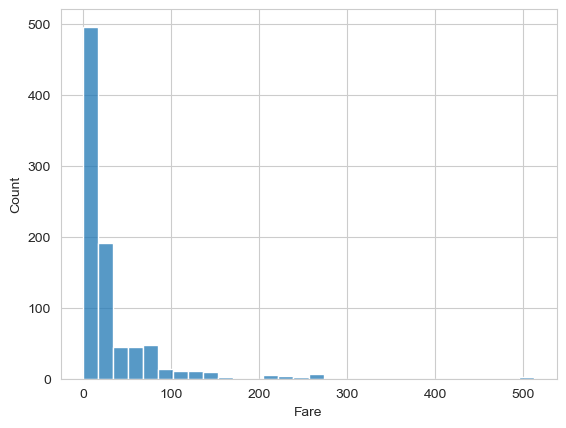

In [17]:
sns.histplot(train['Fare'],bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

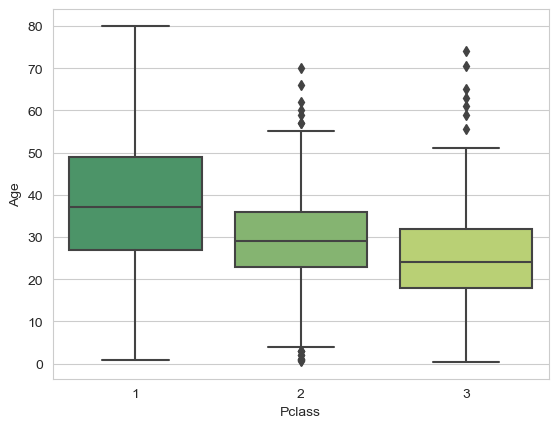

In [18]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

Now we are going to replace the NaN values in the age column based on the passenger class and age. We will replcae the null values with the average values for each passenger class. For the class 1 the average value is 37. for class 2 avg is 29 and for class 3 the average is 24.

In [19]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else :
        return Age 

In [20]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

<Axes: >

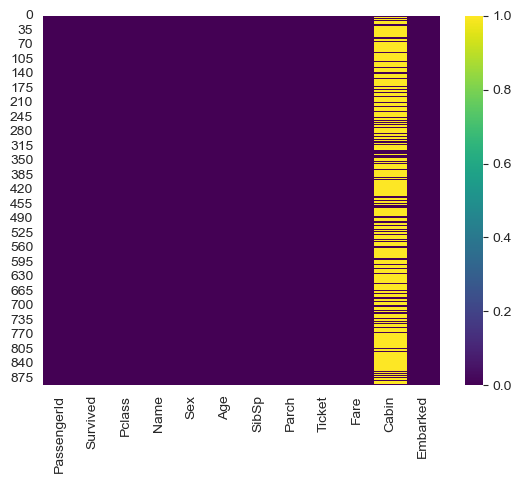

In [21]:
sns.heatmap(train.isnull(),cmap='viridis')

Now we are gping to apply feature enginnering to remove the cabin column as it contains too many null values.

In [22]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now we have to change the categorical features to dummy variables using the get_dummies function in pandas.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
sex=pd.get_dummies(train['Sex'],dtype=int,drop_first=True)
embark=pd.get_dummies(train['Embarked'],dtype=int,drop_first=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [31]:
train=pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train.drop('Survived',axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [34]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
from sklearn.model_selection import train_test_split
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [38]:
Y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [40]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
701,1,35.0,0,0,26.2875,1,0,1
762,3,20.0,0,0,7.2292,1,0,0
855,3,18.0,0,1,9.3500,0,0,1
646,3,19.0,0,0,7.8958,1,0,1
120,2,21.0,2,0,73.5000,1,0,1


In [41]:
y_train

701    1
762    1
855    1
646    0
120    0
      ..
299    1
352    0
743    0
312    0
365    0
Name: Survived, Length: 712, dtype: int64

In [42]:
train_data=x_train.join(y_train)
test_data=x_test.join(y_test)

In [43]:
train_data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
701,1,35.0,0,0,26.2875,1,0,1,1
762,3,20.0,0,0,7.2292,1,0,0,1
855,3,18.0,0,1,9.3500,0,0,1,1
646,3,19.0,0,0,7.8958,1,0,1,0
120,2,21.0,2,0,73.5000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
299,1,50.0,0,1,247.5208,0,0,0,1
352,3,15.0,1,1,7.2292,1,0,0,0
743,3,24.0,1,0,16.1000,1,0,1,0
312,2,26.0,1,1,26.0000,0,0,1,0


In [44]:
from sklearn.ensemble import RandomForestRegressor 

forest=RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
forest.score(x_test,y_test)

0.39420730143646354

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[150,200,300],
    "max_features":[8,4],
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 4],
                         'n_estimators': [150, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_estimator_.score(x_test,y_test)

0.3832176481891828

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=300)

In [57]:
import xgboost as xg

xgb=xg.XGBRegressor(objective='reg:linear',n_estimators=10)

xgb.fit(x_train,y_train) 
  
# Predict the model 
pred = xgb.predict(x_test) 




C:\Users\zakia zaman\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [14:50:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [58]:
pred

array([ 0.19321626, -0.008319  ,  0.93747944,  0.0631009 ,  0.04267615,
        0.14245091,  0.9828292 ,  0.04043726,  0.12546192,  0.12580943,
        0.06933992,  0.12546192,  0.07254499,  0.09942864,  0.05617167,
        0.05617167,  0.9496188 ,  0.3413749 ,  0.8456389 ,  0.893685  ,
        0.75887847,  0.15741737,  0.12012202,  0.5634349 ,  0.934311  ,
        0.1330955 ,  0.04874253,  0.81393707,  0.1493283 ,  0.08750122,
        0.22220662,  0.09984529,  0.05617167,  0.53932256,  0.12947036,
        0.28635192,  0.22967638,  0.09668375,  0.12012202,  0.1490796 ,
        0.05617167,  0.8599527 ,  0.9751838 ,  0.39788747,  0.62884176,
        0.94780153,  0.05799226,  0.9786353 ,  0.09205596,  0.12012202,
        0.06493279,  0.10357197,  0.05617167,  0.84381634,  0.58151037,
        0.02486789,  0.04501262,  0.848699  ,  0.5439048 ,  0.35087326,
       -0.008319  ,  0.04874253,  0.19321626,  0.12012202,  0.05564422,
        0.09449887,  0.04874253,  0.05617167,  0.53283906,  0.05

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y_test,pred)

0.13990885508290618

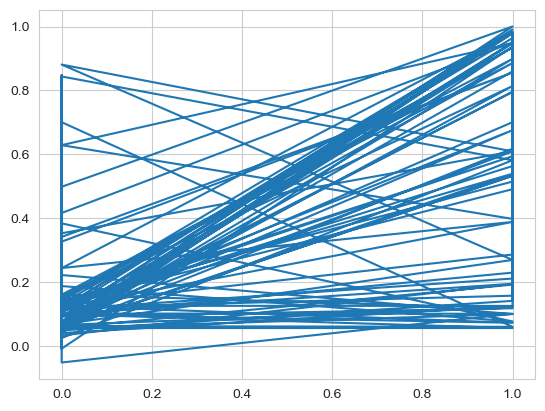

In [65]:
plt.plot(y_test,pred)